In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Investigatory Stop Reports

Given that individual arrest data is the main input for the SSL model, Investigatory Stop Reports (essentially CPD's contact cards for a stop-and-frisk-like program) are recorded and [published on CPD's website for Jan-1-16 through Feb-28-2017](http://home.chicagopolice.org/isr-data/). The download covers race as well as whether the stop ended in an arrest, as well as a large amount of other information There were a total of 132,996 recorded stops in this time period

In [19]:
isr_df = pd.read_csv('data/cpd_isr_data_2016_01_2017_02.csv')
isr_df.info(verbose=True)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,4,11,13,14,16,18,19,22,23,29,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,59,63,64,65,66,72,74,75,100,102,103,104,110,111,117,119,120,121,132,134,138,139,140,141,142,143,144,146,148,150,152,153,154,155,156,157,159,161,163,164,166,169) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132996 entries, 0 to 132995
Data columns (total 171 columns):
CONTACT_CARD_ID                   object
CONTACT_TYPE_CD                   object
CARD_NO                           object
CONTACT_DATE                      object
CONTACT_HOUR                      object
SUBMITTING_BEAT_CD                object
JUVENILE_I                        object
CLOTHING_DESCR                    object
NAME_VERIFIED_I                   object
RD_NO                             object
HOTSPOT_NO                        object
EVENT_NO                          object
MISSION_NO                        object
CPD_UNIT_NO                       object
CREATED_BY                        object
CREATED_DATE                      object
MODIFIED_BY                       object
MODIFIED_DATE                     object
AGE                               object
AGE_TO                            object
SEX_CODE_CD                       object
RACE_CODE_CD               

### Redactions

All information relating to stops with juveniles is redacted, so that can be excluded from any breakdowns

In [20]:
print('There were {:,} stops with juveniles where information is redacted.'.format(isr_df.loc[isr_df['JUVENILE_I'] != 'N', 'CONTACT_CARD_ID'].count()))

isr_df = isr_df.loc[isr_df['JUVENILE_I'] == 'N'].copy()
print('After redactions, there were {:,} ISR stops between Jan 1 2016 and Feb 28 2017'.format(isr_df['CONTACT_CARD_ID'].count()))

There were 21,217 stops with juveniles where information is redacted.
After redactions, there were 111,779 ISR stops between Jan 1 2016 and Feb 28 2017


In [23]:
# Converting CPD race codes to clear meanings
cpd_race_map = {
    'BLK': 'BLACK',
    'WHI': 'WHITE',
    'WHT': 'WHITE',
    'API': 'ASIAN/PACIFIC ISLANDER',
    'WBH': 'BLACK HISPANIC',
    'WWH': 'WHITE HISPANIC',
    'I': 'AMER IND/ALASKAN NATIVE',
    'U': 'UKNOWN'
}

isr_df['RACE'] = isr_df['RACE_CODE_CD'].apply(lambda x: cpd_race_map.get(x, 'U'))

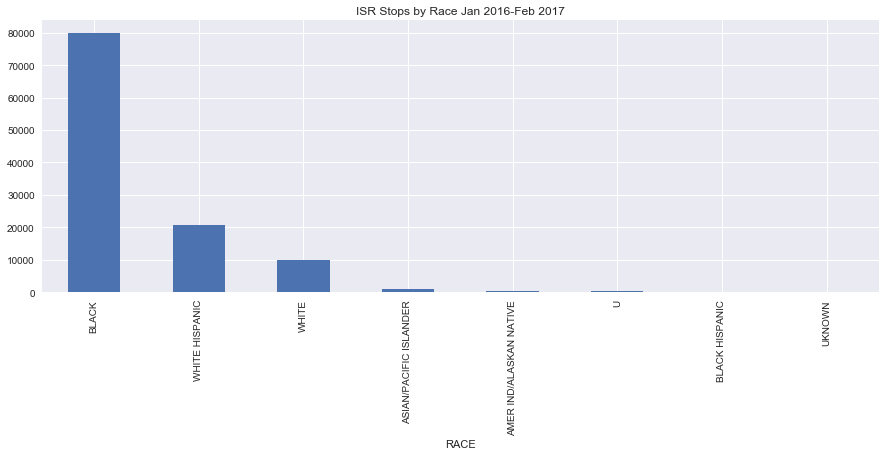

In [24]:
plt.rcParams["figure.figsize"] = [15, 5]

isr_by_race = isr_df.groupby('RACE')['CONTACT_CARD_ID'].count()
isr_by_race.sort_values(ascending=False, inplace=True)
isr_by_race.plot(kind='bar', title='ISR Stops by Race Jan 2016-Feb 2017')

In [30]:
isr_df['AGE'] = isr_df['AGE'].fillna(0)
isr_df['AGE'] = isr_df['AGE'].apply(lambda x: int(x))
isr_df['AGE'] = isr_df['AGE'].astype(int)
isr_df['AGE'].head()

0    21
1    28
2    35
3    28
4    25
Name: AGE, dtype: int64

In [36]:
black_men_lt_30 = isr_df.loc[(isr_df['RACE'] == 'BLACK') &
                             (isr_df['AGE'] < 30) &
                             (isr_df['AGE'] > 0) &
                             (isr_df['SEX_CODE_CD'] == 'M')].copy()
print('There were {:,} Black men between the ages of 18 and 29 included in ISR records'.format(black_men_lt_30['CONTACT_CARD_ID'].count()))

There were 35,221 Black men between the ages of 18 and 29 included in ISR records


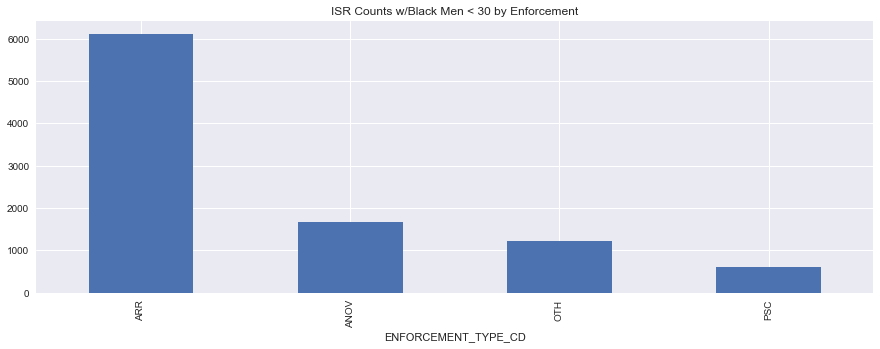

In [34]:
bm_isr_enforcement = black_men_lt_30.groupby('ENFORCEMENT_TYPE_CD')['CONTACT_CARD_ID'].count()
bm_isr_enforcement.sort_values(ascending=False, inplace=True)
bm_isr_enforcement.plot(kind='bar', title='ISR Counts w/Black Men < 30 by Enforcement')

In [37]:
print('There were {:,} Black men between the ages of 18 and 29 arrested during ISRs in the time period'.format(
    black_men_lt_30.loc[black_men_lt_30['ENFORCEMENT_TYPE_CD'] == 'ARR', 'CONTACT_CARD_ID'].count()
))

There were 6,119 Black men between the ages of 18 and 29 arrested during ISRs in the time period


In [38]:
white_men_lt_30 = isr_df.loc[(isr_df['RACE'] == 'WHITE') &
                             (isr_df['AGE'] < 30) &
                             (isr_df['AGE'] > 0) &
                             (isr_df['SEX_CODE_CD'] == 'M')].copy()
print('There were {:,} White men between the ages of 18 and 29 included in ISR records'.format(white_men_lt_30['CONTACT_CARD_ID'].count()))

There were 3,015 White men between the ages of 18 and 29 included in ISR records


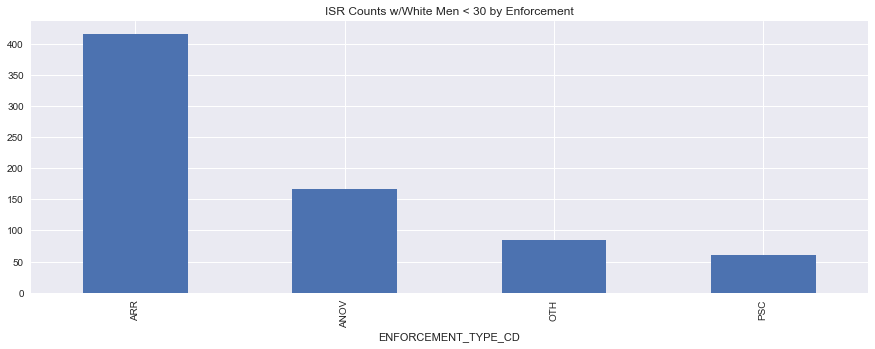

In [39]:
wm_isr_enforcement = white_men_lt_30.groupby('ENFORCEMENT_TYPE_CD')['CONTACT_CARD_ID'].count()
wm_isr_enforcement.sort_values(ascending=False, inplace=True)
wm_isr_enforcement.plot(kind='bar', title='ISR Counts w/White Men < 30 by Enforcement')

In [40]:
print('There were {:,} White men between the ages of 18 and 29 arrested during ISRs in the time period'.format(
    white_men_lt_30.loc[white_men_lt_30['ENFORCEMENT_TYPE_CD'] == 'ARR', 'CONTACT_CARD_ID'].count()
))

There were 417 White men between the ages of 18 and 29 arrested during ISRs in the time period


## ISR Arrest Comparisons

There were 35,521 Black men between the ages of 18 and 29 stopped through ISRs in this time period, while only 3,015 White men in that age range were stopped. Additionally, during these stops, 6,119 Black men were arrested, while only 417 White men were arrested.

This is relevant because the SSL's main inputs come from arrest records, but, as has been demonstrated before, arrests and police enforcement in Chicago are heavily influence by race--particulary during ISR stops. Additionally, there were only 7,024 White men between the ages of 18 and 29 assigned any score at all through the SSL list. The number of Black men in that age range arrested in this single 13-month time period (6,119) is almost that size. This trend of racialized arrests likely continues to influence the SSL model's predictions moving forward, and raises serious concerns about the patterns it identifies.